<a href="https://colab.research.google.com/github/opasniyzapuper/mldl1/blob/main/%D0%9B%D0%B0%D0%B1_4_%D0%9F%D0%B5%D1%82%D1%80%D0%BE%D0%B2_%D0%A0%D0%BE%D0%B6%D0%BE%D0%BA_%D0%98%D0%A310_91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import (GridSearchCV, StratifiedKFold, cross_val_score)
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv', sep=',')

In [ ]:
data = data.drop(['oldpeak'], axis='columns')

In [ ]:
X = data[data.columns[:-1]]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.7, random_state=15
)

In [ ]:
tree1 = DecisionTreeClassifier(random_state=15)

In [ ]:
tree1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=15)

In [ ]:
y_pred =  tree1.predict(X_test)
print('Точность измерений (тестовые данные): ', accuracy_score(y_true = y_test, y_pred = y_pred))

Точность измерений (тестовые данные):  0.7230046948356808


In [ ]:
cross_val_score(tree1, X_train, y_train, cv=5)

array([0.88888889, 0.61111111, 0.72222222, 0.83333333, 0.77777778])

In [ ]:
np.mean(cross_val_score(tree1, X_train, y_train, cv=5))

0.7666666666666667

C кросс валидацией алгоритм дерева показал оценку лучше

RandomForest

In [ ]:
# Инициализируем стратифицированную разбивку нашего датасета для валидации
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=32)

# Инициализируем наш классификатор с дефолтными параметрами
rfc = RandomForestClassifier(random_state=32, n_jobs=-1, oob_score=True)

In [ ]:
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)

from sklearn import metrics
print("Accuracy score: {:.2f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

Accuracy score: 81.22%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Обучаем на тренировочном датасете
results = cross_val_score(rfc, X, y, cv=skf)

# Оцениваем точность на тестовом датасете с помощью кросс валидации
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


CV accuracy score: 81.21%


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
rfc.feature_importances_

array([0.08472133, 0.0293308 , 0.11202659, 0.07710219, 0.09949068,
       0.00896937, 0.02256328, 0.1616829 , 0.07029855, 0.04253464,
       0.07903158, 0.21224808])

In [ ]:
col = [i for i in range(len(rfc.feature_importances_))]
listValues = rfc.feature_importances_
a = list()
for i in range(0, len(col), 1):
  if listValues[i] < 0.01:
    a.append(col[i])
print(a)

[5]


In [ ]:
data1 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv', sep=',')
columns = data.columns
for i in a:
     data1.drop([columns[i]], axis = 1, inplace = True)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    int64  
 11  thal      303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


Алгоритм выбросил только 1 признак - fbs, который никак не коррелирует с целевой переменной. В 3 ЛР осталось 6 признаков, в том числе fbs.

In [ ]:
X = data1[data1.columns[:-1]]
y = data1['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Построим кривые обучения

In [ ]:
# Инициализируем валидацию
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
trees_grid = [5, 10, 15, 20, 30, 50, 75, 100]

# Обучаем на тренировочном датасете
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=32, n_jobs=-1, oob_score=True)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} trees".format(max(test_acc.mean(axis=1))*100, 
                                                        trees_grid[np.argmax(test_acc.mean(axis=1))]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:554: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier w

Best accuracy on CV is 81.84% with 75 trees


Наилучшая точность 81.84% с 75 деревьями

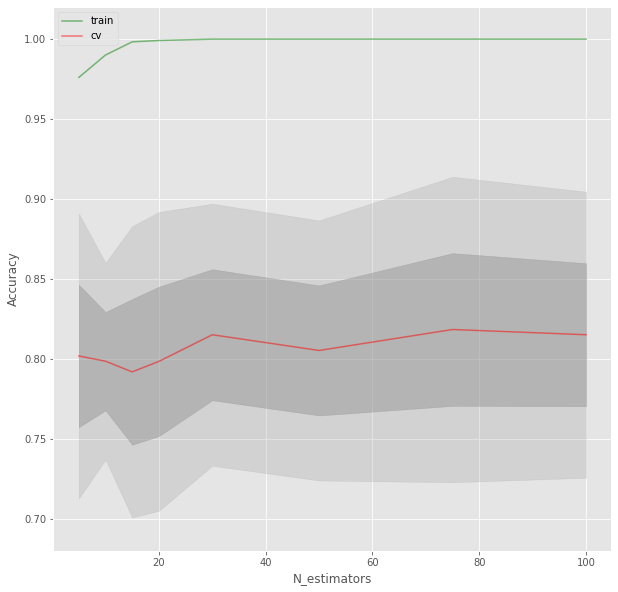

In [ ]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='green', label='train')
ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.68,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("N_estimators");

На тренировочном наборе наше дерево переобучилось. Чтобы избежать переобучения, необходимо добавить параметры регуляризации в модель, начнем с глубины

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

Best accuracy on CV is 83.17% with 5 max_depth


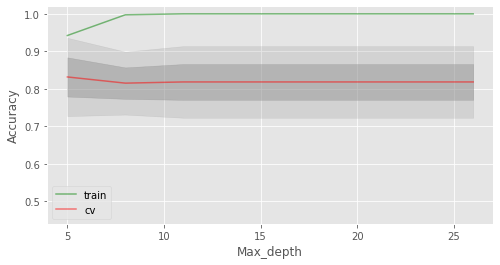

In [ ]:
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_depth_grid = [5, 8, 11, 14, 17, 20, 21, 26]

# Обучаем на тренировочном датасете
for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=75, random_state=32, n_jobs=-1, oob_score=True, max_depth=max_depth)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_depth".format(max(test_acc.mean(axis=1))*100, 
                                                        max_depth_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_depth_grid, train_acc.mean(axis=1), alpha=0.5, color='green', label='train')
ax.plot(max_depth_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_depth_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.44,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_depth");

In [ ]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
min_samples_leaf_grid = [5, 8, 11, 14, 17, 20, 21, 26]

# Обучаем на тренировочном датасете
for min_samples_leaf in min_samples_leaf_grid:
    rfc = RandomForestClassifier(n_estimators=75, random_state=32, n_jobs=-1, 
                                 oob_score=True, min_samples_leaf=min_samples_leaf)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} min_samples_leaf".format(max(test_acc.mean(axis=1))*100, 
                                                        min_samples_leaf_grid[np.argmax(test_acc.mean(axis=1))]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

Best accuracy on CV is 83.50% with 8 min_samples_leaf


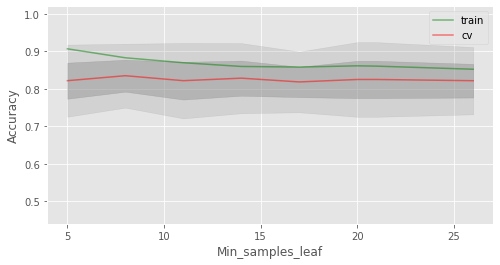

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(min_samples_leaf_grid, train_acc.mean(axis=1), alpha=0.5, color='green', label='train')
ax.plot(min_samples_leaf_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(min_samples_leaf_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.44,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Min_samples_leaf");

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

Best accuracy on CV is 82.84% with 8 max_features


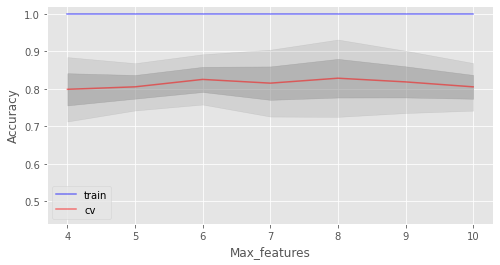

In [ ]:
# Создаем списки для сохранения точности на тренировочном и тестовом датасете
train_acc = []
test_acc = []
temp_train_acc = []
temp_test_acc = []
max_features_grid = [4, 5, 6, 7, 8, 9, 10]

# Обучаем на тренировочном датасете
for max_features in max_features_grid:
    rfc = RandomForestClassifier(n_estimators=75, random_state=32, n_jobs=-1, 
                                 oob_score=True, max_features=max_features)
    temp_train_acc = []
    temp_test_acc = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rfc.fit(X_train, y_train)
        temp_train_acc.append(rfc.score(X_train, y_train))
        temp_test_acc.append(rfc.score(X_test, y_test))
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
print("Best accuracy on CV is {:.2f}% with {} max_features".format(max(test_acc.mean(axis=1))*100, 
                                                        max_features_grid[np.argmax(test_acc.mean(axis=1))]))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(max_features_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
ax.plot(max_features_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
ax.fill_between(max_features_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
ax.legend(loc='best')
ax.set_ylim([0.44,1.02])
ax.set_ylabel("Accuracy")
ax.set_xlabel("Max_features");

Оптимальное число признаков - 8

с помощью GridSearch мы найдем оптимальные параметры для нашей задачи.

In [ ]:
parameters = {'max_features': [4, 6, 8, 10], 'min_samples_leaf': [1, 3, 5, 8], 'max_depth': [5,10,15,20]}
rfc = RandomForestClassifier(n_estimators=75, random_state=32, 
                             n_jobs=-1, oob_score=True)
gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_estimators=75, n_jobs=-1,
                                              oob_score=True, random_state=32),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 6, 8, 10],
                         'min_samples_leaf': [1, 3, 5, 8]},
             verbose=1)

In [ ]:
gcv.best_estimator_, gcv.best_score_

(RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=5,
                        n_estimators=75, n_jobs=-1, oob_score=True,
                        random_state=32), 0.838360655737705)

Лучшая точность — 83.83% при: 'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 5.

Градиентный бустинг

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostRegressor
import numpy as np

scores = np.ndarray([10, 10])
for i, n_trees in enumerate(np.linspace(1, 100, 10)):
    for j, depth in enumerate(np.arange(2, 12)):
        p = CatBoostRegressor(n_estimators=n_trees, max_depth=depth).fit(X_train, y_train).predict(X_test)
        scores[i, j] = mean_squared_error(y_test, p)

Выходные данные были обрезаны до нескольких последних строк (5000).
Learning rate set to 0.5
0:	learn: 0.4423463	total: 280us	remaining: 6.17ms
1:	learn: 0.3918703	total: 787us	remaining: 8.26ms
2:	learn: 0.3633955	total: 982us	remaining: 6.55ms
3:	learn: 0.3561151	total: 1.39ms	remaining: 6.61ms
4:	learn: 0.3458532	total: 1.78ms	remaining: 6.42ms
5:	learn: 0.3372773	total: 2.16ms	remaining: 6.12ms
6:	learn: 0.3318479	total: 2.54ms	remaining: 5.8ms
7:	learn: 0.3270838	total: 2.92ms	remaining: 5.47ms
8:	learn: 0.3229978	total: 3.29ms	remaining: 5.11ms
9:	learn: 0.3216233	total: 3.67ms	remaining: 4.77ms
10:	learn: 0.3212316	total: 4.25ms	remaining: 4.64ms
11:	learn: 0.3198992	total: 4.67ms	remaining: 4.29ms
12:	learn: 0.3159026	total: 5.08ms	remaining: 3.91ms
13:	learn: 0.3114630	total: 5.49ms	remaining: 3.53ms
14:	learn: 0.3089265	total: 5.88ms	remaining: 3.13ms
15:	learn: 0.3078810	total: 6.27ms	remaining: 2.74ms
16:	learn: 0.3024458	total: 6.67ms	remaining: 2.35ms
17:	learn: 0.2990906

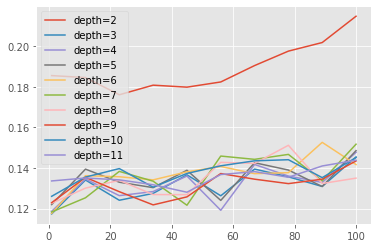

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

for i in range(scores.shape[0]):
    plt.plot(np.linspace(1, 100, 10), scores[i], label='depth=' + str(np.arange(2, 12)[i]))
plt.legend()

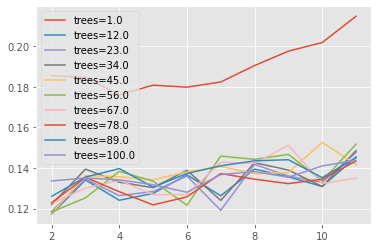

In [ ]:
for i in range(scores.shape[1]):
    plt.plot(np.arange(2, 12), scores[i], label='trees=' + str(np.linspace(1, 100, 10)[i]))
plt.legend()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

linear_preds = RandomForestRegressor(max_depth = 10, max_features = 4, min_samples_leaf = 5).fit(X_train, y_train).predict(X_test)
res5 = mean_squared_error(y_test, linear_preds) ** 0.5
print(res5)

0.36569556484619403


Градиентный бустинг отработал лучше случайного леса